In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2016-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2016_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5615,사하구,8175,사하구,2560,45.59%,"6,895"
1,2016-01-07,간장,오복왕표 0.9ℓ 1병,6290,사하구,6290,사하구,0,0.0%,"6,290"
2,2016-01-07,고등어,30㎝정도 500g 1마리,4500,사하구,4875,사하구,375,8.33%,"4,688"
3,2016-01-07,달걀,오경슈퍼란60g정도 10개,2900,사하구,2990,사하구,90,3.1%,"2,945"
4,2016-01-07,닭고기,육계 1.0㎏,5752,사하구,6650,사하구,898,15.61%,"6,201"
5,2016-01-07,대파,1.0㎏,3782,사하구,4152,사하구,370,9.78%,"3,967"
6,2016-01-07,돼지고기,삼겹살 500g,7950,사하구,9000,사하구,1050,13.21%,"8,475"
7,2016-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
8,2016-01-07,라면,신라면 120g 1봉지,630,사하구,634,사하구,4,0.63%,632
9,2016-01-07,맥주,하이트 500㎖ 1병,1260,사하구,1350,사하구,90,7.14%,"1,305"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2016-04-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2016_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-04-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,사하구,8428,사하구,1753,26.26%,"7,552"
1,2016-04-07,고등어,30㎝정도 500g 1마리,5937,사하구,6714,사하구,777,13.09%,"6,326"
2,2016-04-07,달걀,오경슈퍼란60g정도 10개,2590,사하구,2900,사하구,310,11.97%,"2,745"
3,2016-04-07,닭고기,육계 1.0㎏,5221,사하구,6590,사하구,1369,26.22%,"5,906"
4,2016-04-07,대파,1.0㎏,3692,사하구,4152,사하구,460,12.46%,"3,922"
5,2016-04-07,돼지고기,삼겹살 500g,8600,사하구,9450,사하구,850,9.88%,"9,025"
6,2016-04-07,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
7,2016-04-07,라면,신라면 120g 1봉지,630,사하구,634,사하구,4,0.63%,632
8,2016-04-07,맥주,하이트 500㎖ 1병,1260,사하구,1350,사하구,90,7.14%,"1,305"
9,2016-04-07,무,2.0㎏ 1개,1880,사하구,1990,사하구,110,5.85%,"1,935"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2016-07-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2016_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-07-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,사하구,11993,사하구,3818,46.7%,"10,084"
1,2016-07-07,고등어,30㎝정도 500g 1마리,2111,사하구,4433,사하구,2322,110.0%,"3,272"
2,2016-07-07,달걀,오경슈퍼란60g정도 10개,2590,사하구,2900,사하구,310,11.97%,"2,745"
3,2016-07-07,닭고기,육계 1.0㎏,6106,사하구,6990,사하구,884,14.48%,"6,548"
4,2016-07-07,대파,1.0㎏,2763,사하구,3179,사하구,416,15.06%,"2,971"
5,2016-07-07,돼지고기,삼겹살 500g,9950,사하구,11000,사하구,1050,10.55%,"10,475"
6,2016-07-07,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
7,2016-07-07,라면,신라면 120g 1봉지,600,사하구,634,사하구,34,5.67%,617
8,2016-07-07,맥주,하이트 500㎖ 1병,1260,사하구,1350,사하구,90,7.14%,"1,305"
9,2016-07-07,무,2.0㎏ 1개,1550,사하구,1590,사하구,40,2.58%,"1,570"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2016-10-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2016_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-10-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5615,사하구,7425,사하구,1810,32.24%,"6,520"
1,2016-10-06,고등어,30㎝정도 500g 1마리,2777,사하구,3289,사하구,512,18.44%,"3,033"
2,2016-10-06,달걀,오경슈퍼란60g정도 10개,2790,사하구,2900,사하구,110,3.94%,"2,845"
3,2016-10-06,닭고기,육계 1.0㎏,6272,사하구,7590,사하구,1318,21.01%,"6,931"
4,2016-10-06,대파,1.0㎏,3435,사하구,4152,사하구,717,20.87%,"3,794"
5,2016-10-06,돼지고기,삼겹살 500g,9450,사하구,9900,사하구,450,4.76%,"9,675"
6,2016-10-06,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
7,2016-10-06,라면,신라면 120g 1봉지,630,사하구,630,사하구,0,0.0%,630
8,2016-10-06,맥주,하이트 500㎖ 1병,1260,사하구,1350,사하구,90,7.14%,"1,305"
9,2016-10-06,무,2.0㎏ 1개,2790,사하구,2980,사하구,190,6.81%,"2,885"


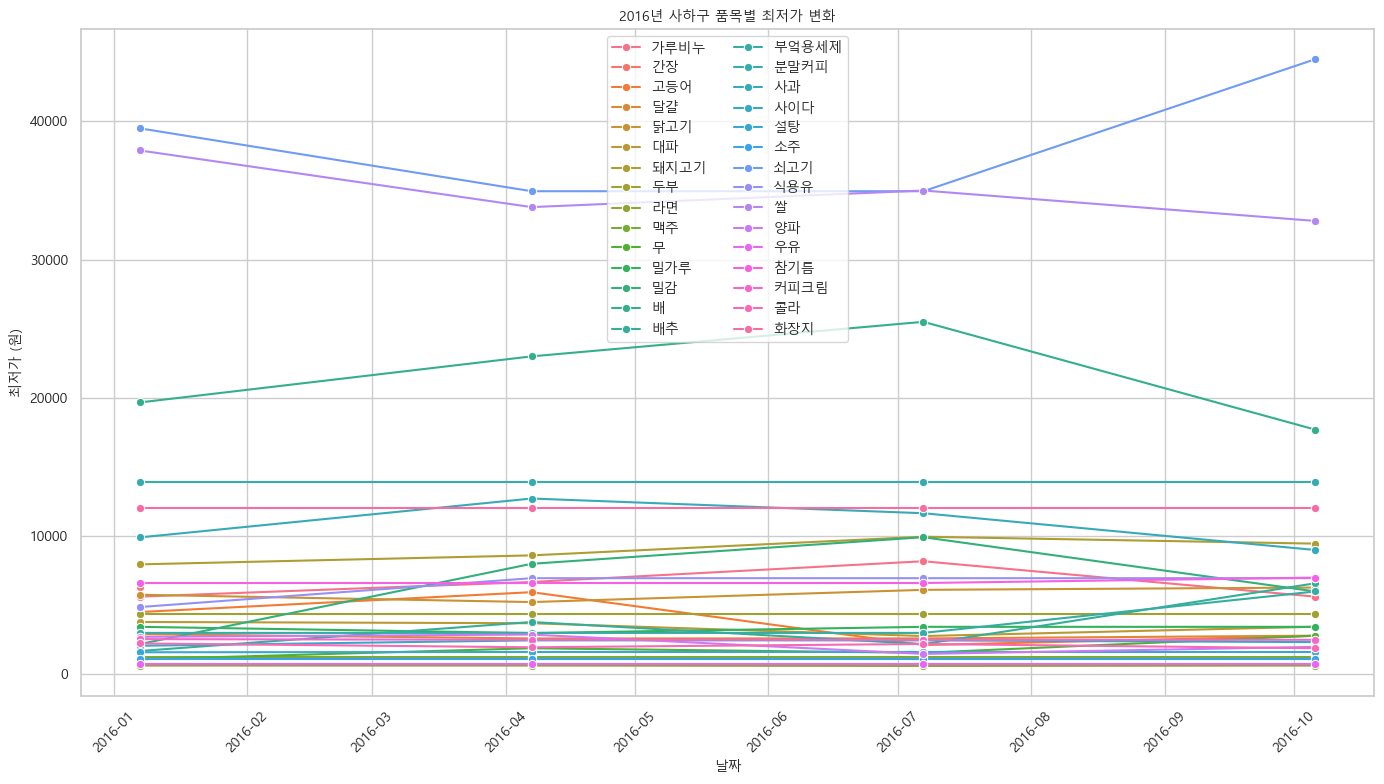

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2016_1q.csv")
q2 = pd.read_csv("사하구2016_2q.csv")
q3 = pd.read_csv("사하구2016_3q.csv")
q4 = pd.read_csv("사하구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 사하구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사하구2016_min.csv", index=False, encoding="utf-8-sig")

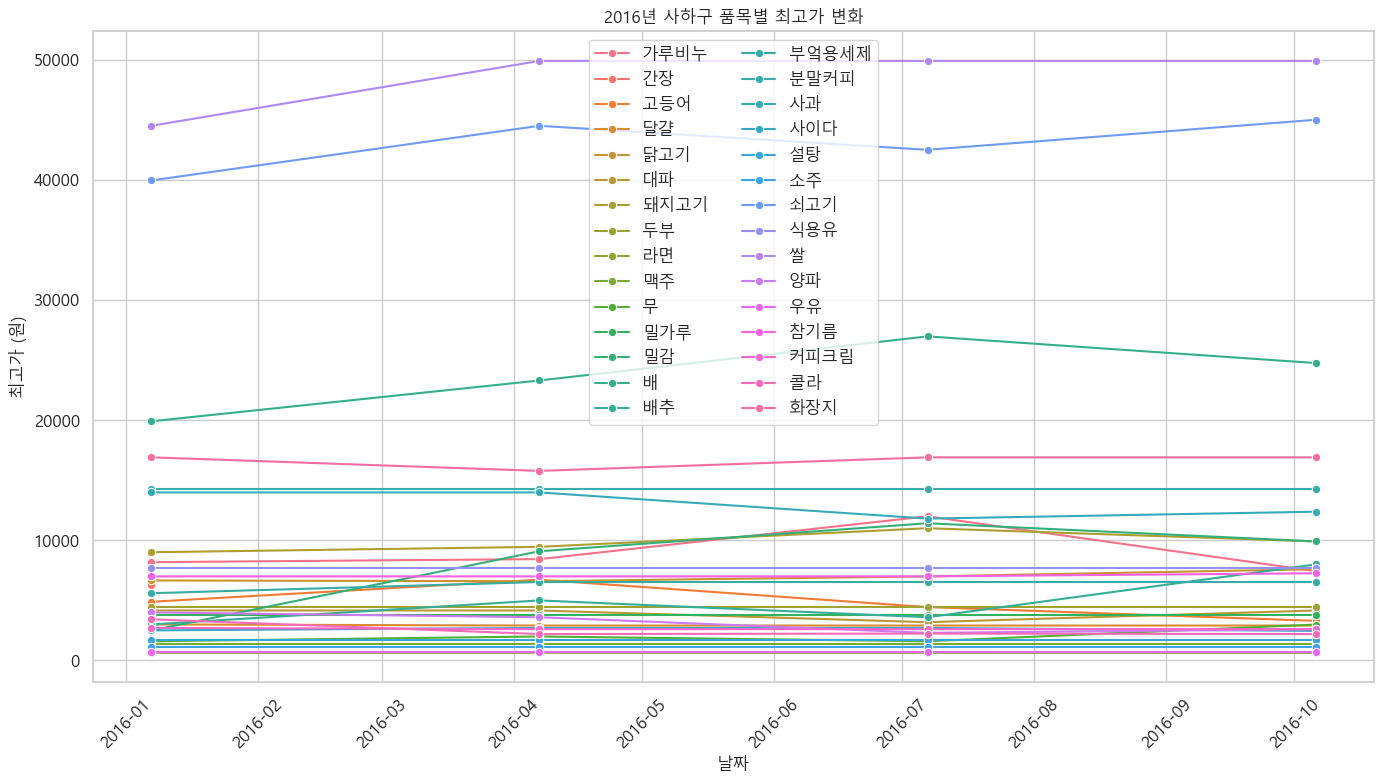

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2016_1q.csv")
q2 = pd.read_csv("사하구2016_2q.csv")
q3 = pd.read_csv("사하구2016_3q.csv")
q4 = pd.read_csv("사하구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 사하구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사하구2016_max.csv", index=False, encoding="utf-8-sig")